### Push Style

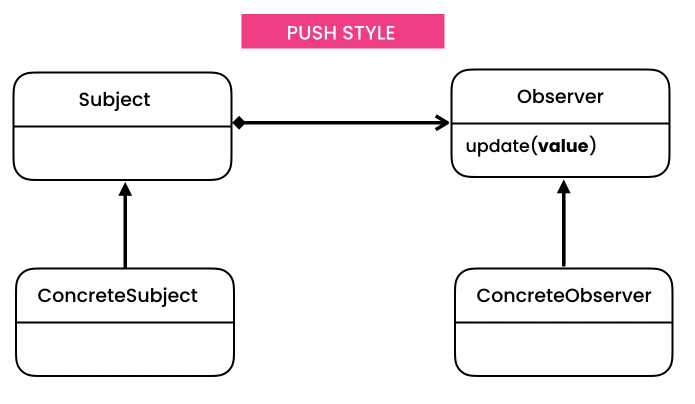

In [58]:
public interface IObserver<T> {
    void Update(T data);
}

In [59]:
public class Event<TData> {
    private List<IObserver<TData>> subscribers = new List<IObserver<TData>>();
    
    public void AddSubscriber(IObserver<TData> subscriber) {
        subscribers.Add(subscriber);
    }
    
    public void RemoveSubscriber(IObserver<TData> subscriber) {
        subscribers.Remove(subscriber);
    }

    public void Notify(TData data) {
        foreach(var subscriber in subscribers) {
            subscriber.Update(data);
        }
    }
}

In [60]:
public class DataSource {
    public readonly Event<int> OnValueChange;
    
    public DataSource() {
        OnValueChange = new Event<int>();
    }
    
    private int value;
    public int Value { 
        get {
            return this.value;
        } 
        set { 
            this.value = value;
            OnValueChange.Notify(value);
        } 
    }
}

In [61]:
public class SpreadSheet : IObserver<int> {
    public void Update(int data) {
        Console.WriteLine($"SpreadSheet: value was changed {data}");
    }
}

public class Chart : IObserver<int> {
    public void Update(int data) {
        Console.WriteLine($"Chart: value was changed {data}");
    }
}

In [62]:
var spreadSheet = new SpreadSheet();
var chart = new Chart();

var dataSource = new DataSource();
dataSource.OnValueChange.AddSubscriber(spreadSheet);
dataSource.OnValueChange.AddSubscriber(chart);

dataSource.Value = 5;
dataSource.Value = 6;
dataSource.Value = 7;

dataSource.OnValueChange.RemoveSubscriber(chart);
dataSource.Value = 10;

SpreadSheet: value was changed 5
Chart: value was changed 5
SpreadSheet: value was changed 6
Chart: value was changed 6
SpreadSheet: value was changed 7
Chart: value was changed 7
SpreadSheet: value was changed 10


### Pull Style

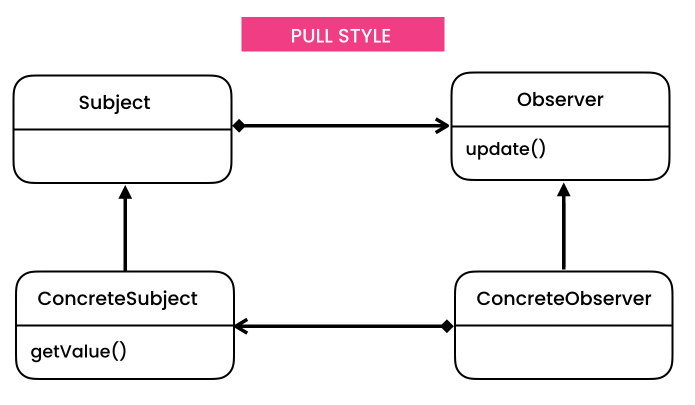

In [68]:
 public interface IObserver {
    void Update();
}

public class Event {
    private List<IObserver> subscribers = new List<IObserver>();
    
    public void AddSubscriber(IObserver subscriber) {
        subscribers.Add(subscriber);
    }
    
    public void RemoveSubscriber(IObserver subscriber) {
        subscribers.Remove(subscriber);
    }

    public void NotifySubscribers() {
        foreach(var subscriber in subscribers) {
            subscriber.Update();
        }
    }
}

In [69]:
public class DataSource {
    public readonly Event OnValueChange;
    
    public DataSource() {
        OnValueChange = new Event();
    }
    
    private int value;
    public int Value { 
        get {
            return this.value;
        } 
        set { 
            this.value = value;
            OnValueChange.NotifySubscribers();
        } 
    }
}

In [73]:
public class SpreadSheet : IObserver {
    private DataSource dataSource;
    
    public SpreadSheet(DataSource dataSource) {
        this.dataSource = dataSource;
        dataSource.OnValueChange.AddSubscriber(this);
    }
    
    public void Update() {
        Console.WriteLine($"SpreadSheet: value was changed {dataSource.Value}");
    }
}

public class Chart : IObserver {
    private DataSource dataSource;
    
    public Chart(DataSource dataSource) {
        this.dataSource = dataSource;
        dataSource.OnValueChange.AddSubscriber(this);
    }
    
    public void Update() {
        Console.WriteLine($"Chart: value was changed {dataSource.Value}");
    }
}

In [74]:
var dataSource = new DataSource();
var spreadSheet = new SpreadSheet(dataSource);
var chart = new Chart(dataSource);

dataSource.Value = 5;
dataSource.Value = 6;
dataSource.Value = 7;

dataSource.OnValueChange.RemoveSubscriber(chart);
dataSource.Value = 10;

SpreadSheet: value was changed 5
Chart: value was changed 5
SpreadSheet: value was changed 6
Chart: value was changed 6
SpreadSheet: value was changed 7
Chart: value was changed 7
SpreadSheet: value was changed 10
